Internet Resources:

[Python Programming.net - machine learning episodes 20-33](https://pythonprogramming.net/support-vector-machine-intro-machine-learning-tutorial/)  
[MIT OpenCourseWare 16 Machine Learning: Support Vector Machines](https://www.youtube.com/watch?v=_PwhiWxHK8o)  
[Victor Lavrenko - IR20.6 Sequential minimal optimization (SMO)](https://www.youtube.com/watch?v=I73oALP7iWA)

<IPython.core.display.Javascript object>


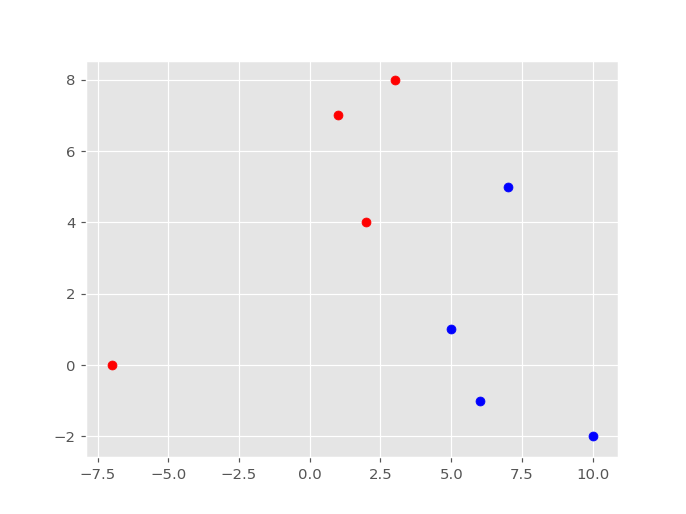

In [17]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math

style.use("ggplot")

samples_x = [
    [1,7],
    [2,4],
    [3,8],
    [5,1],
    [6,-1],
    [7,5],
    [10,-2],
    [-7,0]
]

samples_y = [1,1,1,-1,-1,-1, -1, 1]

[plt.scatter(xi[0], xi[1], color = "r" if yi == 1 else "b") for xi, yi in zip(samples_x, samples_y)]
plt.show()

<IPython.core.display.Javascript object>


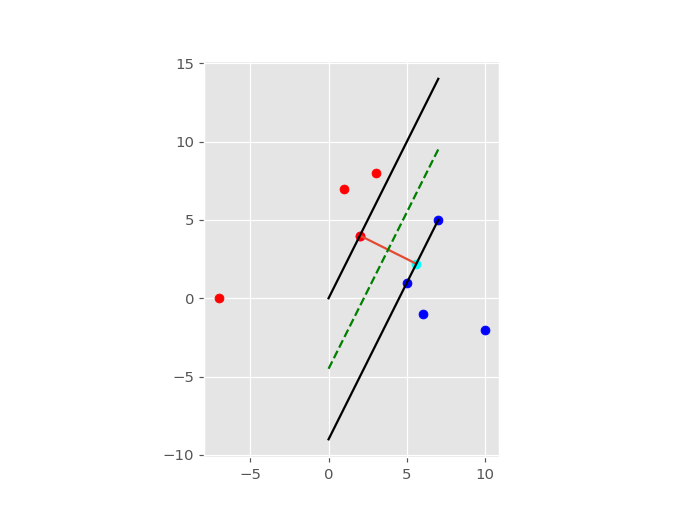

h+ & h- distance:  4.024922359499621
h+ & h- distance:  4.024922359499621
10 -7
(0, 7, 9.0)


In [18]:
# linear hard margin classifier

class SVM:
    def __init__(self):
        self.colors = {1:'r',-1:'b'}
        self.fig = plt.figure()
        self.b = 5
        self.w = [-1,1]
        self.ax = self.fig.add_subplot(1,1,1)
        
    def fit(self, x, y, error = 0):
        self.xs = x
        self.ys = y
        
        x_pluses = []
        x_minuses = []
        [ x_pluses.append(xi) if yi==1 else x_minuses.append(xi) for xi, yi in zip(self.xs, self.ys)]
        x_pluses = np.array(x_pluses)
        x_minuses = np.array(x_minuses)
        
        alpha_pluses = [1 / len(x_pluses) for _ in x_pluses]
        alpha_minuses = [1 / len(x_minuses) for _ in x_minuses]
    
        h_minus = np.dot(alpha_minuses, x_minuses)
        h_plus = np.dot(alpha_pluses, x_pluses)
        
        
        def optimize(j, k, alphas, xs, h_opt, h_const):
            if j != k:
                c = alphas[j] + alphas[k]
                x = xs[j] - xs[k]
                h = h_const
                u = h_opt - (alphas[j]*xs[j] + alphas[k]*xs[k]) + c*xs[k]
                a = max(0, min(c, np.dot(x, h-u)/np.dot(x,x)))
                return a, c-a
            else:
                return alphas[j], alphas[k]
            
      
        last_distance = math.inf
        optimzed = False
        while not optimzed:
            for j in range(len(alpha_pluses)):
                for k in range(len(alpha_minuses)):
                    alpha_pluses[j], alpha_pluses[k] = optimize(j,k,alpha_pluses, x_pluses, h_plus, h_minus)
                    h_plus = np.dot(alpha_pluses, x_pluses)
            
            for j in range(len(alpha_minuses)):
                for k in range(len(alpha_pluses)):
                    alpha_minuses[j], alpha_minuses[k] = optimize(j,k, alpha_minuses, x_minuses, h_minus, h_plus)
                    h_minus = np.dot(alpha_minuses, x_minuses)
            
            new_distance = np.linalg.norm(np.subtract(h_minus, h_plus))
            optimzed = last_distance - new_distance == error
            last_distance = new_distance
            print("h+ & h- distance: ",last_distance)
        
        self.w = 2*(h_plus-h_minus) / np.linalg.norm(h_plus-h_minus)**2
        self.b = -np.dot(self.w,0.5*(h_plus-h_minus)+h_minus)
        
        self.ax.scatter(h_minus[0], h_minus[1], c = "cyan")
        self.ax.scatter(h_plus[0], h_plus[1], c = "magenta")
        self.ax.plot([h_plus[0], h_minus[0]], [h_plus[1], h_minus[1]])

       
            
            
            
    def predict(self, features, visualize = True):
        classifications = []
        for feature in features:
            classifications.append(np.sign(np.dot(np.array(feature), self.w) + self.b))
        
            if classifications[-1] != 0 and visualize:
                self.ax.scatter(feature[0],feature[1],s=200,marker='*', c=self.colors[classifications[-1]])
            elif classifications[-1] == 0:
                print('featureset',features,'is on the decision boundary')
        return classifications
    
    
    
    def visualize(self):
        self.max_feature_value = 0
        self.min_feature_value = math.inf
        for feature in self.xs:
            for xi in feature:
                self.max_feature_value = xi if xi > self.max_feature_value else self.max_feature_value
                self.min_feature_value = xi if xi < self.min_feature_value else self.min_feature_value
                
        print(self.max_feature_value,  self.min_feature_value)
        
        [plt.scatter(xi[0], xi[1], color = "r" if yi == 1 else "b") for xi, yi in zip(self.xs, self.ys)]
        
        def hyperplane(x,w,b,v):
            # v = (w.x+b)
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value*0,7,self.max_feature_value*0.9)
        print(datarange)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # w.x + b = 1
        # pos sv hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max], [psv1,psv2], "k")
        
        # w.x + b = -1
        # negative sv hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max], [nsv1,nsv2], "k")

        # w.x + b = 0
        # decision
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max], [db1,db2], "g--")
        
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()
    
svm = SVM()
svm.fit(samples_x, samples_y)

predict_samples =  [[0,10],
              [1,3],
              [3,5],
              [5,6],
              [6,-5],
              [5,3]]
svm.predict(predict_samples, False)
svm.visualize()

![](notes_screenshots/SVM_1.png)
![](notes_screenshots/SVM_2.png)
![](notes_screenshots/SVM_3.png)